# Import important modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Load dataset

In [3]:
df = pd.read_csv(r"C:\Users\yashk\Downloads\creditcard.csv\creditcard.csv")

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
print("Losses due to fraud:")
print("Total amount lost to fraud")
print(df.Amount[df.Class == 1].sum())
print("Mean amount per fraudulent transaction")
print(df.Amount[df.Class == 1].mean())
print("Compare to normal transactions:")
print("Total amount from normal transactions")
print(df.Amount[df.Class == 0].sum())
print("Mean amount per normal transactions")
print(df.Amount[df.Class == 0].mean())

Losses due to fraud:
Total amount lost to fraud
60127.97
Mean amount per fraudulent transaction
122.21132113821139
Compare to normal transactions:
Total amount from normal transactions
25102462.04
Mean amount per normal transactions
88.29102242231328


# Data visulization and analysis

<Axes: xlabel='Class', ylabel='count'>

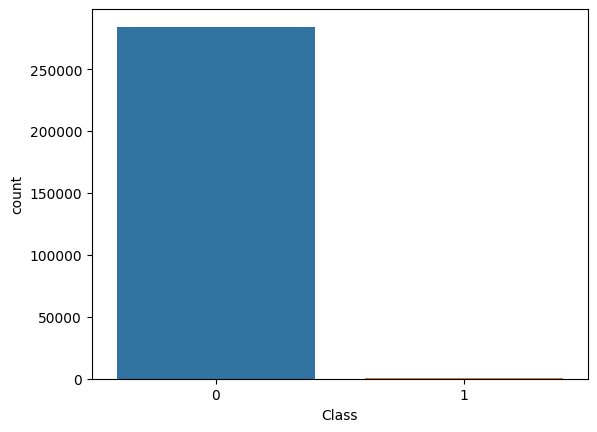

In [7]:
# class 0 represent not fraud count and class 1 represent fraud count
sns.countplot(x='Class', data = df)

look at the plot we have too many values for class "0" which is normal transaction and
less no of values for "1" which is fraud transation. so we have to equally distribute the data b/w the class

C:\Users\yashk\AppData\Local\Temp\ipykernel_7276\3697864109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Amount"])


<Axes: xlabel='Amount', ylabel='Density'>

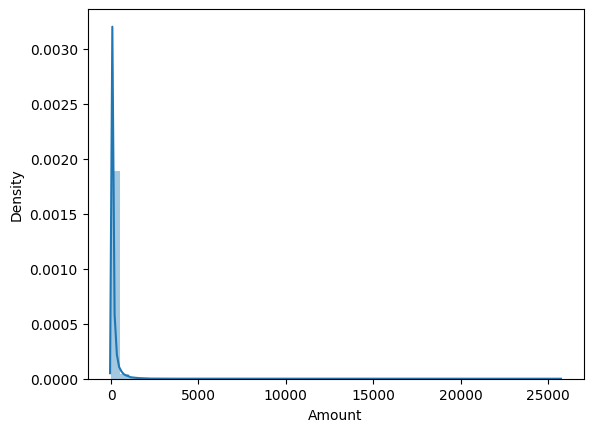

In [11]:
sns.distplot(df["Amount"])

C:\Users\yashk\AppData\Local\Temp\ipykernel_7276\1101780921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Time"])


<Axes: xlabel='Time', ylabel='Density'>

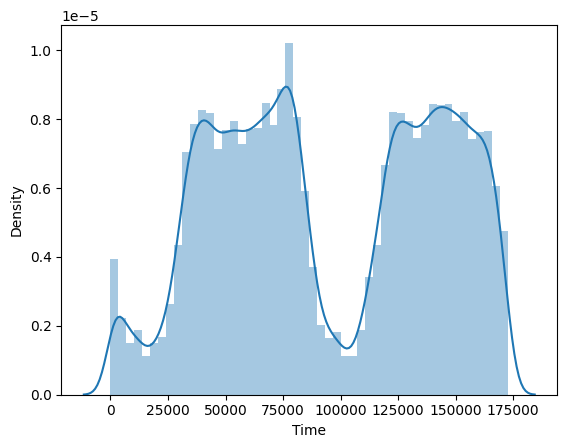

In [13]:
sns.distplot(df["Time"])

C:\Users\yashk\AppData\Local\Temp\ipykernel_7276\2796663851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Class"])


<Axes: xlabel='Class', ylabel='Density'>

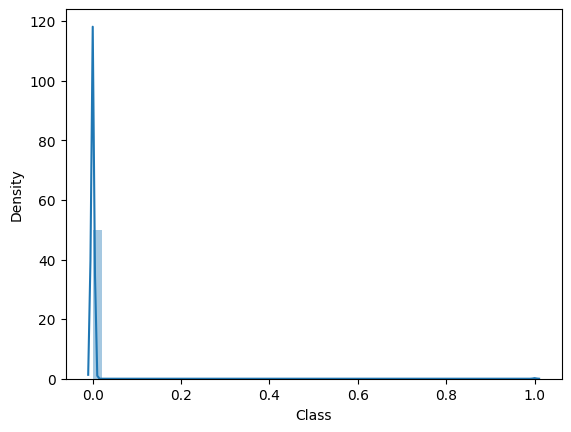

In [14]:
sns.distplot(df["Class"])

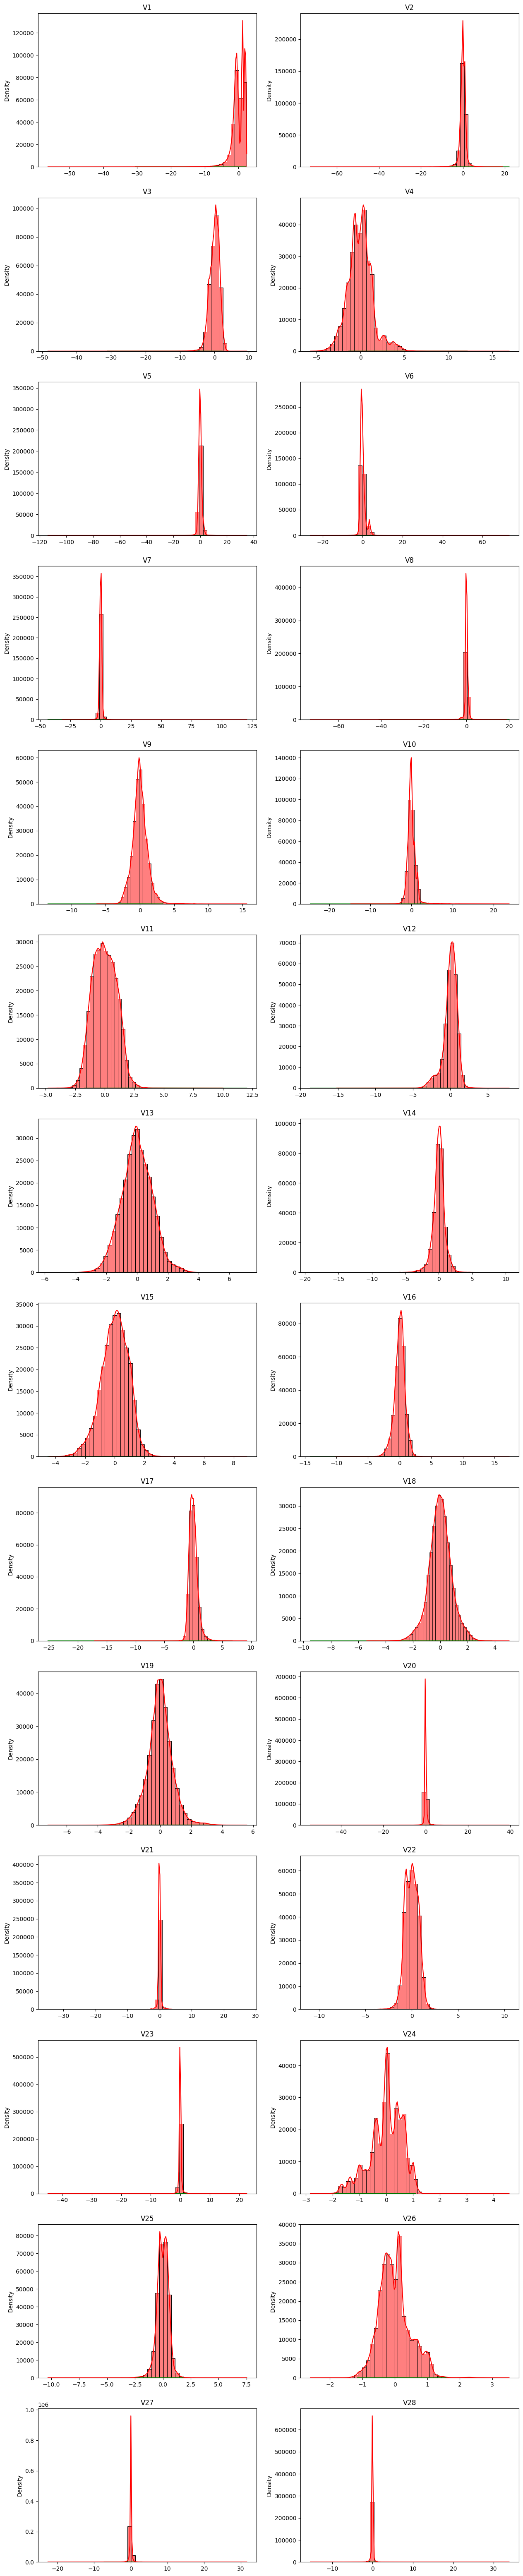

In [15]:
%matplotlib inline
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(df[col][frauds], bins = 50, color='g',kde=True) #Will receive the "semi-salmon" violin
    sns.histplot(df[col][normals], bins = 50, color='r',kde=True) #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

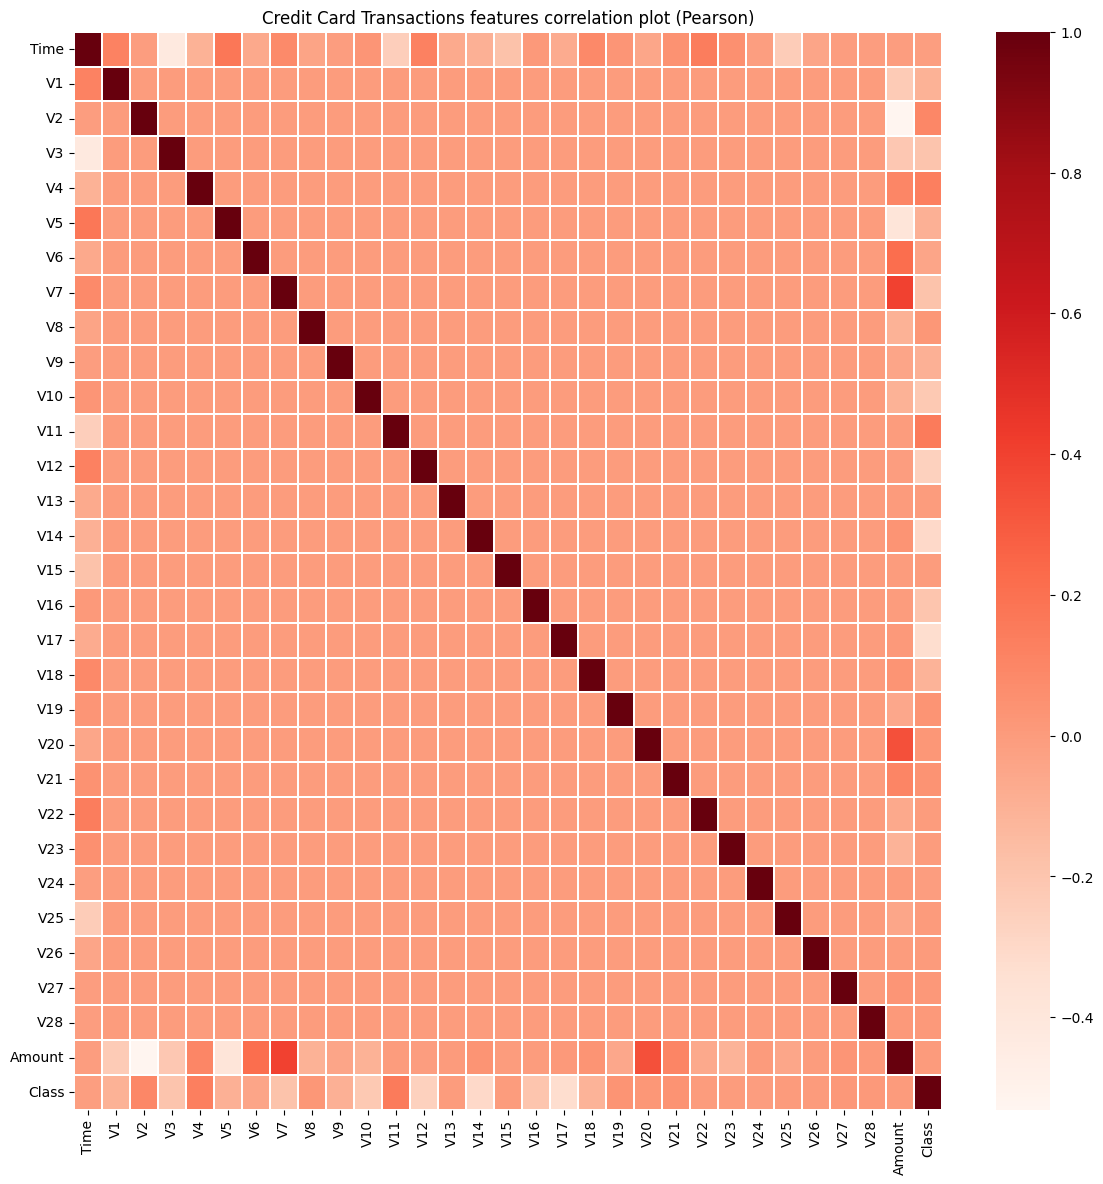

In [82]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

this data is highly unbalance 

In [20]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [24]:
print(legit.shape)

(284315, 31)


In [25]:
print(fraud.shape)

(492, 31)


In [28]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [30]:
#compare data for both
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


making legit of the shape (492,31)

In [31]:
legit_sample = legit.sample(n=492)

In [33]:
print(legit_sample.shape,fraud.shape)

(492, 31) (492, 31)


Concate both dataset

In [42]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [37]:
new_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88648,62229.0,1.194675,-0.253985,0.308779,0.666972,-0.408303,0.089072,-0.335587,0.164184,0.941751,...,-0.110987,-0.154107,-0.105615,-0.408740,0.489156,0.609524,-0.022645,-0.000934,19.95,0
139843,83385.0,-0.487255,1.031614,1.685720,-0.100578,-0.031113,-0.681156,0.653246,0.024220,-0.786474,...,-0.150950,-0.382045,-0.009561,0.537387,-0.223250,0.038430,0.265375,0.115125,4.99,0
194106,130445.0,-3.718955,3.358688,-4.090988,-0.553549,-1.435122,-0.948094,-1.997446,3.178261,-1.145556,...,0.630134,0.706685,0.269210,0.299868,-0.231822,0.483128,-1.350841,-0.380488,1.50,0
218350,141279.0,2.003503,0.057969,-1.778231,0.575723,0.355979,-0.529269,-0.081470,-0.036167,0.579411,...,0.011577,0.277477,0.070679,0.689229,0.069638,0.583837,-0.049902,-0.033927,1.00,0
129722,79198.0,-0.277244,-0.555592,1.802042,-0.721265,-1.269286,0.102139,0.286437,-0.211990,-0.940209,...,0.515153,1.298240,0.135999,-0.095949,-0.285903,0.020650,-0.045620,-0.063172,189.00,0


In [38]:
new_df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [43]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96216.412602,0.083955,0.063671,0.046576,0.006466,-0.036180,0.026314,0.009830,-0.032145,0.063216,...,0.035170,-0.007395,0.000532,0.023854,-0.010872,0.023904,-0.011075,-0.010065,-0.001091,81.893638
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Train and Test dataset

In [51]:
x = new_df.drop(columns="Class",axis=1)

In [52]:
y = new_df["Class"]

In [54]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
88648,62229.0,1.194675,-0.253985,0.308779,0.666972,-0.408303,0.089072,-0.335587,0.164184,0.941751,...,-0.225560,-0.110987,-0.154107,-0.105615,-0.408740,0.489156,0.609524,-0.022645,-0.000934,19.95
139843,83385.0,-0.487255,1.031614,1.685720,-0.100578,-0.031113,-0.681156,0.653246,0.024220,-0.786474,...,0.161402,-0.150950,-0.382045,-0.009561,0.537387,-0.223250,0.038430,0.265375,0.115125,4.99
194106,130445.0,-3.718955,3.358688,-4.090988,-0.553549,-1.435122,-0.948094,-1.997446,3.178261,-1.145556,...,-0.846379,0.630134,0.706685,0.269210,0.299868,-0.231822,0.483128,-1.350841,-0.380488,1.50
218350,141279.0,2.003503,0.057969,-1.778231,0.575723,0.355979,-0.529269,-0.081470,-0.036167,0.579411,...,-0.163077,0.011577,0.277477,0.070679,0.689229,0.069638,0.583837,-0.049902,-0.033927,1.00
129722,79198.0,-0.277244,-0.555592,1.802042,-0.721265,-1.269286,0.102139,0.286437,-0.211990,-0.940209,...,0.733425,0.515153,1.298240,0.135999,-0.095949,-0.285903,0.020650,-0.045620,-0.063172,189.00


In [53]:
y.head()

88648     0
139843    0
194106    0
218350    0
129722    0
Name: Class, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=2)

In [73]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
243026,151759.0,-1.072770,-0.550694,1.375009,-0.776730,1.133149,-0.603424,-0.329113,0.269164,0.800579,...,0.033978,0.348648,0.800216,-0.030186,0.600266,-0.180449,-0.375710,0.141190,0.197685,9.99
24220,33124.0,1.119939,0.534285,0.756047,2.525117,-0.188040,-0.314723,0.081530,0.025408,-0.695090,...,-0.237016,-0.151428,-0.500965,0.164135,0.336208,0.211443,-0.175525,-0.000195,0.023825,5.99
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,3.209171,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56
124115,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,0.058063,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00
152295,97235.0,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,...,1.925103,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,9.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,17520.0,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,1.455878,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00
27749,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
9252,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00


In [74]:
y_train

243026    0
24220     0
81609     1
124115    1
152295    1
         ..
10568     1
27749     1
623       1
9252      1
143442    0
Name: Class, Length: 688, dtype: int64

In [58]:
print(x_train.shape,x_test.shape)

(688, 30) (296, 30)


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [75]:
model.fit(x_train,y_train)

LogisticRegression()

In [76]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [77]:
print("Accuracy",model.score(x_test,y_test))

Accuracy 0.9222972972972973


In [66]:
 from sklearn import tree

In [78]:
models = tree.DecisionTreeClassifier()
models.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
models.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
print("Accuracy",model.score(x_test,y_test))

Accuracy 0.9222972972972973


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [86]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
print("Accuracy",model.score(x_test,y_test))

Accuracy 0.9358108108108109


We investigated the data, checking for data unbalancing, visualizing the features and understanding
the relationship between different features. We then investigated two predictive models. 
The data was split in 2 parts, a train set and a test set. For the models,
we only used the train and test set.

We started with LogisticRegression, for which we obtained an AUC scode of 0.92 when predicting the target for the test set.
We started with tree.DecisionTreeClassifier, for which we obtained an AUC scode of 0.92 when predicting the target for the test set.
We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.93 when predicting the target for the test set.
